# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

In [3]:
#pip install --upgrade tensorflow

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn for data visualization
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test



# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [5]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/Python course - AIML/Computer Vision/Project/images.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/Python course - AIML/Computer Vision/Project/Labels.csv')


## Data Overview





### Understand the shape of the dataset

In [7]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)



- images is an array containing 4750 RGB images, each of size 128x128 pixels.
- labels is a 2D array with 4750 rows and 1 column, where each row corresponds to the label of an image.



## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)


### How are these different category plant images different from each other?

In [8]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

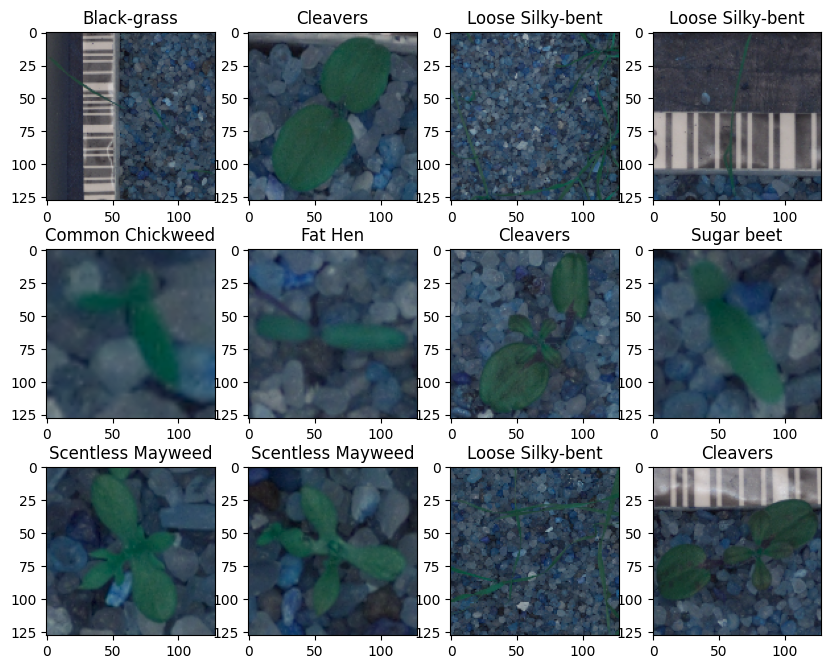

In [9]:
plot_images(images,labels)

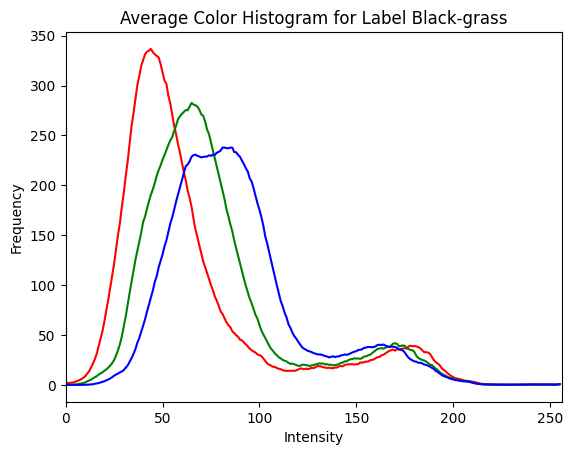

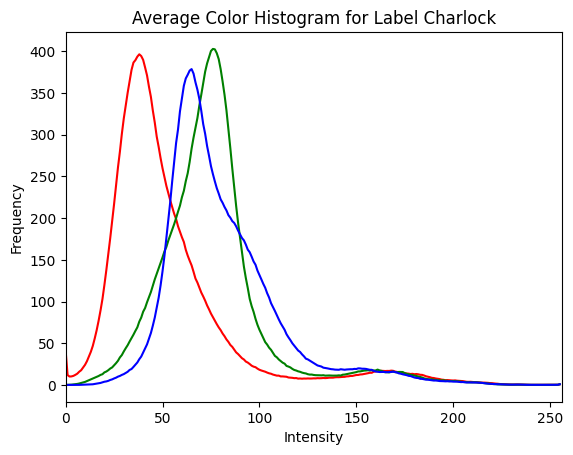

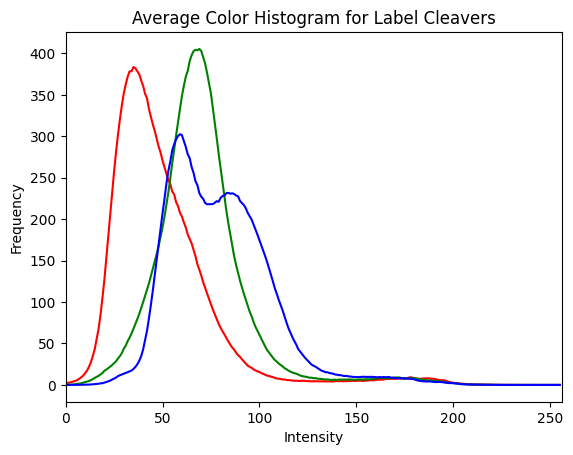

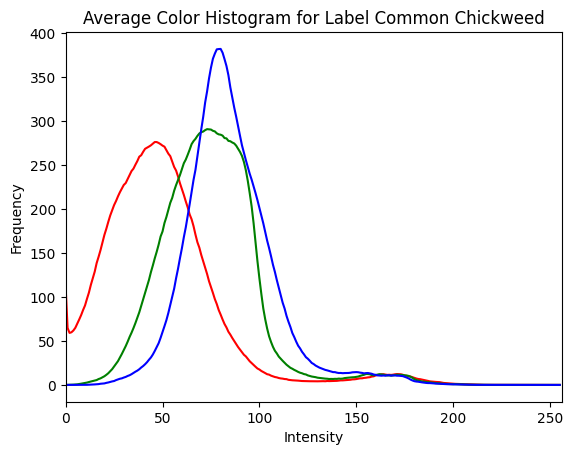

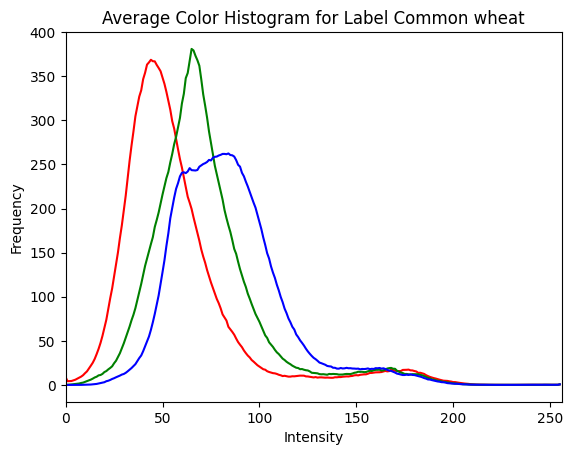

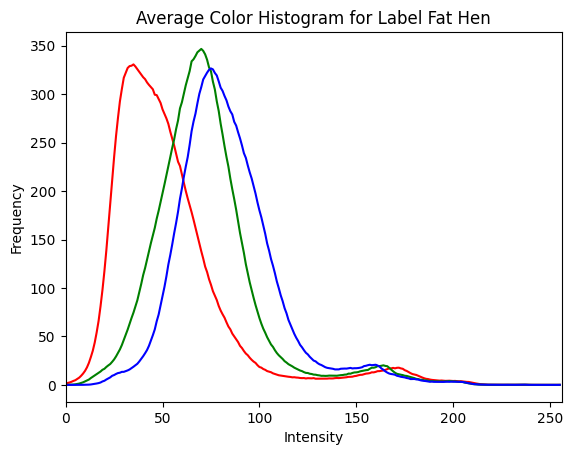

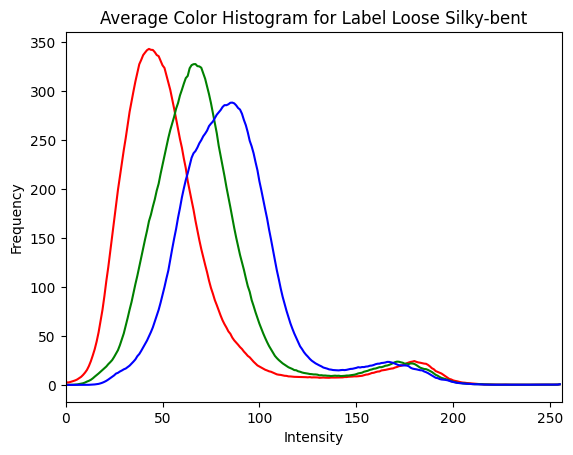

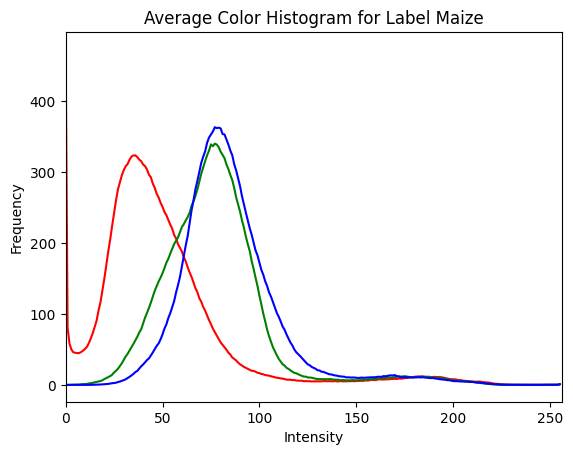

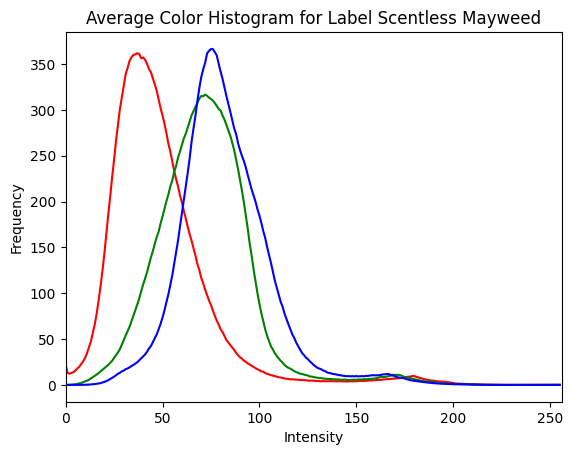

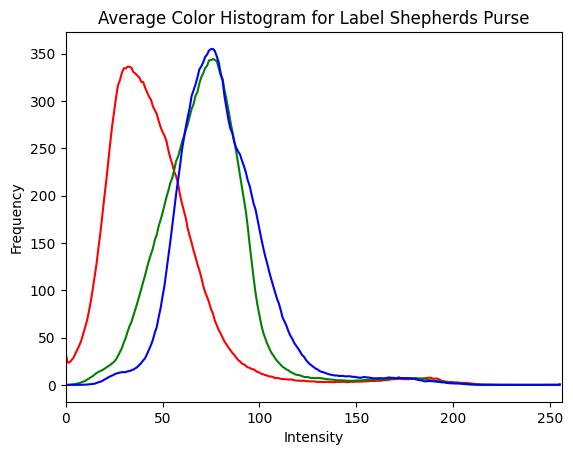

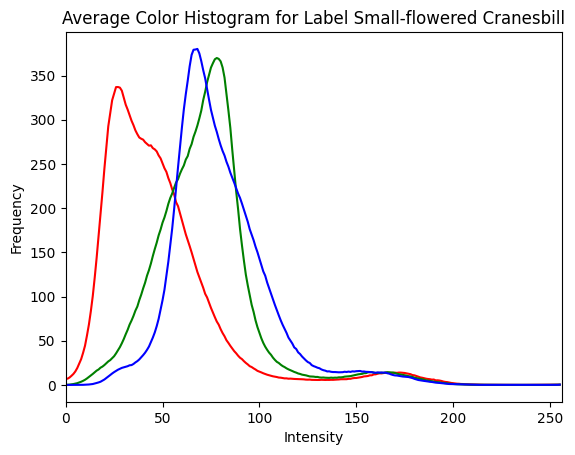

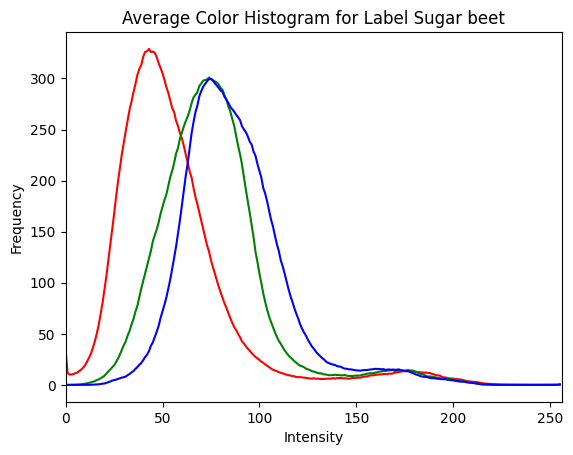

In [10]:
def plot_color_histograms_by_category(images, labels):
    # Convert labels to a NumPy array and flatten if it is a DataFrame
    if isinstance(labels, pd.DataFrame):
        labels = labels.values.flatten()

    unique_labels = np.unique(labels)  # Get unique label categories

    for label in unique_labels:
        label_images = images[labels == label]  # Get images for current label
        colors = ('r', 'g', 'b')

        plt.figure()
        plt.title(f"Average Color Histogram for Label {label}")
        plt.xlabel("Intensity")
        plt.ylabel("Frequency")

        # Initialize histogram arrays for each color channel
        avg_hist_r = np.zeros((256,))
        avg_hist_g = np.zeros((256,))
        avg_hist_b = np.zeros((256,))

        # Accumulate histograms for each image in the label category
        for image in label_images:
            hist_r = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
            hist_g = cv2.calcHist([image], [1], None, [256], [0, 256]).flatten()
            hist_b = cv2.calcHist([image], [2], None, [256], [0, 256]).flatten()

            avg_hist_r += hist_r
            avg_hist_g += hist_g
            avg_hist_b += hist_b

        # Average the histograms
        avg_hist_r /= len(label_images)
        avg_hist_g /= len(label_images)
        avg_hist_b /= len(label_images)

        # Plot averaged histograms
        plt.plot(avg_hist_r, color='r')
        plt.plot(avg_hist_g, color='g')
        plt.plot(avg_hist_b, color='b')
        plt.xlim([0, 256])
        plt.show()

# Example usage
plot_color_histograms_by_category(images, labels)

- **Black-grass:** Histogram suggests that the "Black-grass" images are generally darker, with more pixels concentrated in the lower intensity range (darker shades). The distribution of red, green, and blue pixels is somewhat similar, indicating that the images might not have a strong, distinct color but rather a muted, darker tone. This kind of information can help in distinguishing "Black-grass" images from other categories with different color distributions.
-**Common Chickweed:** Histogram suggests that "Common Chickweed" images tend to be darker with a slight dominance in the blue and green channels, potentially giving them a cool-toned appearance. This color distribution may help differentiate "Common Chickweed" images from other plant categories that have different dominant color profiles or brightness distributions.
-**Maize:**Histogram suggests that "Maize" images have a cooler, predominantly green-blue color profile, with darker red tones. This color distribution may indicate that "Maize" images generally contain a lot of foliage or vegetation, with green and blue tones reflecting the typical colors seen in maize plants. This unique color pattern could help distinguish "Maize" from other plant categories.

### Is the dataset provided an imbalance?

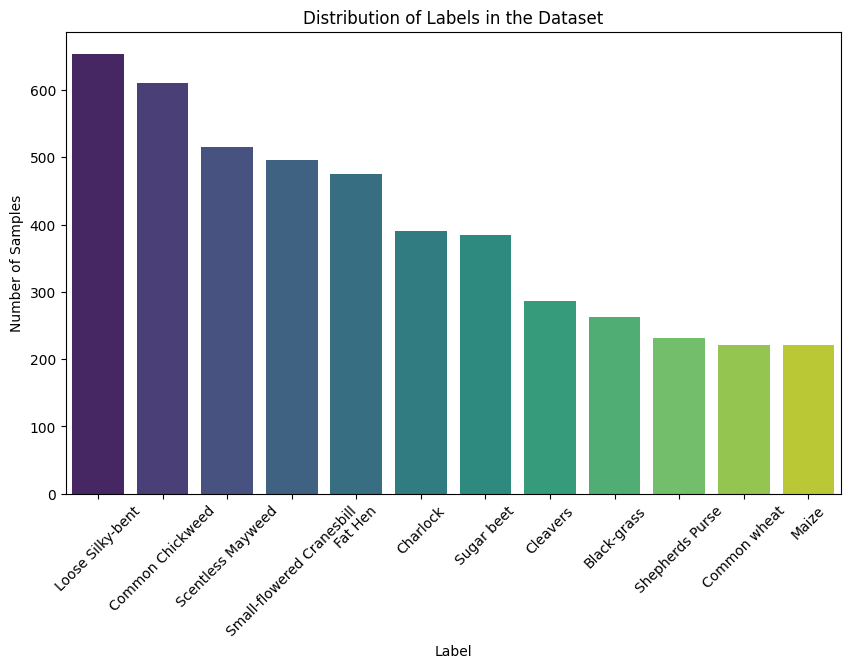

In [11]:
label_counts = pd.Series(labels.values.flatten()).value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title("Distribution of Labels in the Dataset")
plt.xlabel("Label")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

- Losse Silky-bent and Common Chickweed seems to have more number of samples
- Looks like the dataset is bit imbalanced

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [12]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [13]:
images_decreased=[]
height = 64
width =  64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [14]:
from sklearn.model_selection import train_test_split

# First split: 10% of the data for testing
X_temp, X_test, y_temp, y_test = train_test_split(
    np.array(images_decreased), labels, test_size=0.1, random_state=42, stratify=labels
)

# Second split: 10% of the remaining data for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp
)

### Encode the target labels

In [15]:
enc = LabelBinarizer()                           # Initialize the LabelBinarizer
y_train_encoded = enc.fit_transform(y_train)     # Fit and transform y_train
y_val_encoded = enc.transform(y_val)             # Transform y_val
y_test_encoded = enc.transform(y_test)           # Transform y_test


In [16]:
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

### Data Normalization

In [17]:
X_train_normalized = X_train.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

## Model Building

#### **Convolutional Neural Network (CNN)**


#####**Model**

In [18]:
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [19]:
#Initiallizing the sequential model
model = Sequential()

#Adding first conv layer with 128 filters and kernel size 3X3, with padding 'SAME' provides the output size same as input size
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
#Adding max pooling to reduce the sixe of output of the first conv layer
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))

#Adding second conv layer with 64 filters and kernel size 3X3, with padding 'SAME' provides the output size same as input size
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))

#Adding third conv layer with 32 filters and kernel size 3X3, with padding 'SAME' provides the output size same as input size
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

model.add(Dense(32, activation='relu'))

# Final output layer, 12 classes for classification
model.add(Dense(12, activation='softmax'))

#Using Adam optimizer
opt=Adam()

#Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          65,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             396 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,804 (632.05 KB)

 Trainable params: 161,804 (632.05 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#Fitting the model with training data
history = model.fit(X_train_normalized, y_train_encoded,
                    batch_size=32, epochs=30,
                    validation_data=(X_val_normalized, y_val_encoded))

Epoch 1/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.1039 - loss: 2.4639 - val_accuracy: 0.1752 - val_loss: 2.4127
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2600 - loss: 2.2359 - val_accuracy: 0.4159 - val_loss: 1.6899
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4292 - loss: 1.6536 - val_accuracy: 0.4836 - val_loss: 1.5190
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5125 - loss: 1.4284 - val_accuracy: 0.5093 - val_loss: 1.4102
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5659 - loss: 1.2741 - val_accuracy: 0.5397 - val_loss: 1.2811
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6150 - loss: 1.1221 - val_accuracy: 0.5841 - val_loss: 1.1802
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6505 - loss: 1.0136 - val_accuracy: 0.6192 - val_loss: 1.0910
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6681 - loss: 0.9428 - val_accurac

**Plotting Accuracy vs Epoch Curve**

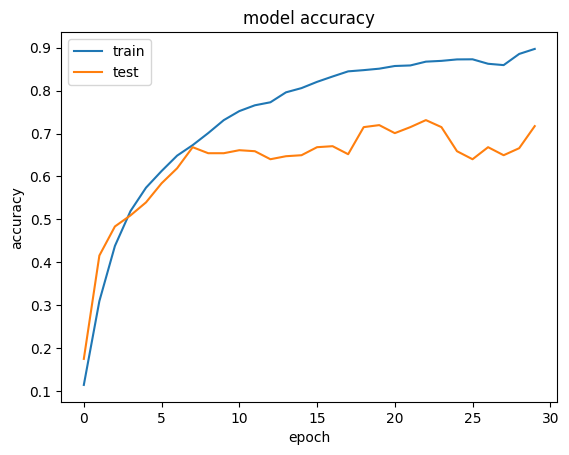

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observation**:

- Training accuracy curve steadily increases and plateaus around 0.8–0.85. This indicates that the model is learning the training data well and continues to improve in the initial epochs, then stabilizes.
- Test accuracy curve initially rises along the training accuracy. However, it plateaus earlier and at a lower value (around 0.6–0.7). This suggests that the model's performance on unseen data is not as high as on the training data.
- Around between 10 -15 epochs the gap starts between training and testing curve which indicates a potential overfitting of the model.


In [22]:
model.evaluate(X_test_normalized,y_test_encoded)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7503 - loss: 1.0320


[1.2175328731536865, 0.7200000286102295]

In [23]:
#Test prediction
y_test_pred = model.predict(X_test_normalized)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test_encoded, axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [24]:
#Test Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test_true_classes, y_test_pred_classes)

0.72

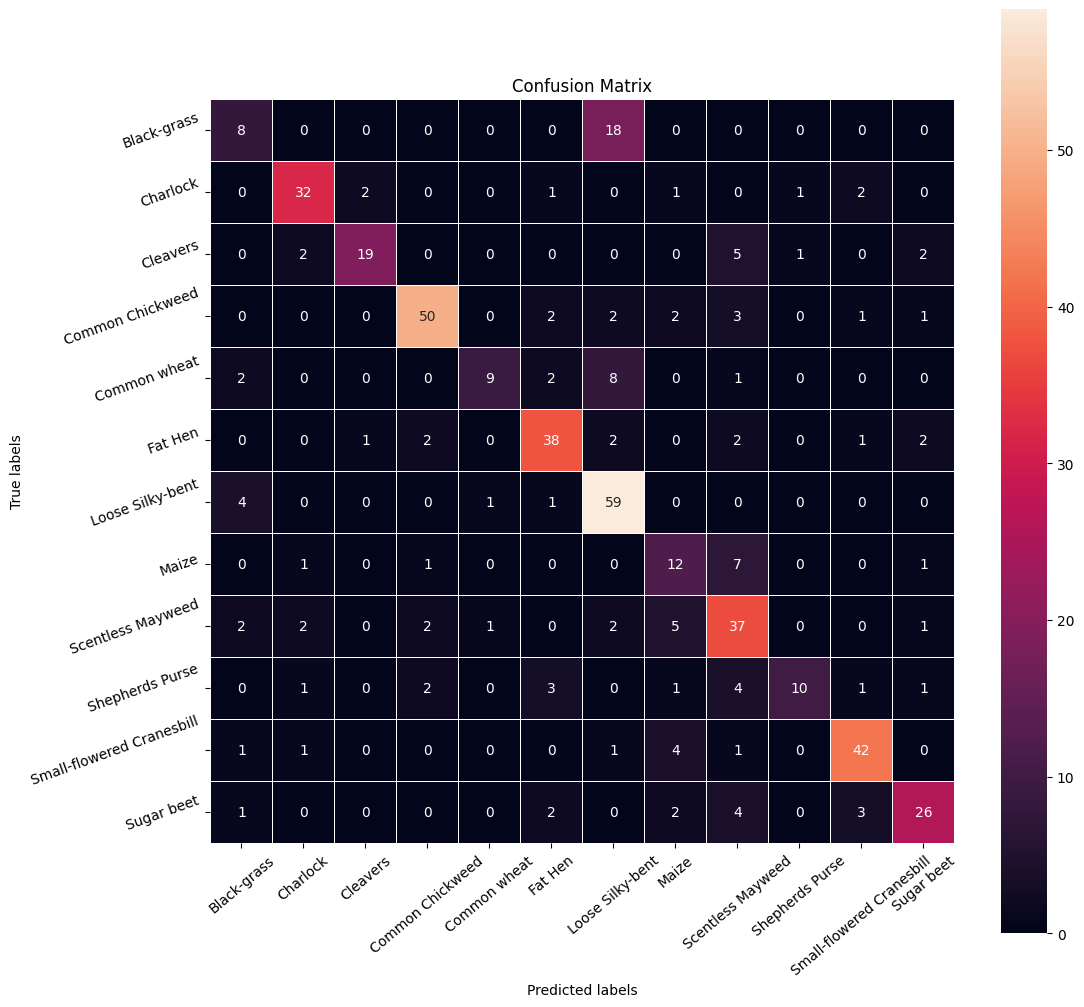

In [25]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)
confusion_matrix = tf.math.confusion_matrix(y_test_true_classes, y_test_pred_classes)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()



**Observation**:

- Model was able to predict only few classes well and not doing great on many of the classes

- Based on the accuracy, loss model seems to be slightly overfitting. We can try adding dropouts and more layers



#####**Model1**

Lets build another CNN model with dropouts added to the model.

In [26]:
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [27]:
#Initiallizing the sequential model
model1 = Sequential()

#Adding first conv layer with 128 filters and kernel size 3X3, with padding 'SAME' provides the output size same as input size
model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))

#Adding second conv layer with 64 filters and kernel size 3X3, with padding 'SAME' provides the output size same as input size
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))


#Adding third conv layer with 32 filters and kernel size 3X3, with padding 'SAME' provides the output size same as input size
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.3))

model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.3))

# Final output layer, 12 classes for classification
model1.add(Dense(12, activation='softmax'))

#Using Adam optimizer
opt=Adam()

#Compile the model
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Summary of the model
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             396 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 229,452 (896.30 KB)

 Trainable params: 229,452 (896.30 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
#Fitting the model with training data
history = model1.fit(X_train_normalized, y_train_encoded,
                    batch_size=32, epochs=30,
                    validation_data=(X_val_normalized, y_val_encoded))

Epoch 1/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.1025 - loss: 2.4657 - val_accuracy: 0.2453 - val_loss: 2.3423
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2241 - loss: 2.3301 - val_accuracy: 0.3762 - val_loss: 1.8797
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3289 - loss: 1.9445 - val_accuracy: 0.4673 - val_loss: 1.6711
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4123 - loss: 1.7141 - val_accuracy: 0.5210 - val_loss: 1.5091
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4854 - loss: 1.5176 - val_accuracy: 0.5421 - val_loss: 1.4006
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5152 - loss: 1.4098 - val_accuracy: 0.6262 - val_loss: 1.1511
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5738 - loss: 1.2394 - val_accuracy: 0.6519 - val_loss: 1.0434
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6055 - loss: 1.1734 - val_accuracy

**Plotting Accuracy vs Epoch Curve**

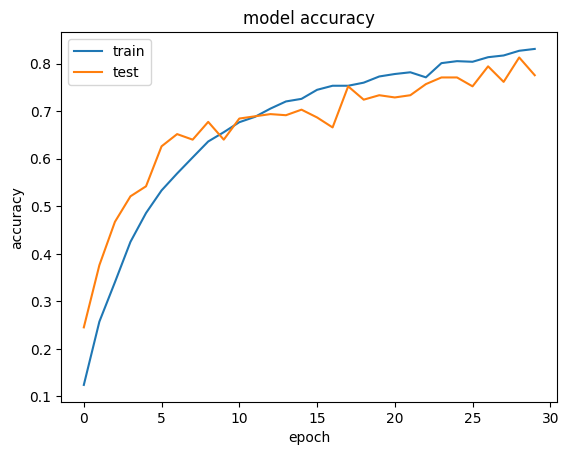

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Observation:

- The training accuracy increases steadily over the epochs, reaching close to 0.8 by the end. This indicates that the model is learning from the training data and improving its ability to classify correctly.
- The test accuracy also rises initially, closely following the training accuracy, and stabilizes around 0.7–0.75. This indicates that the model generalizes reasonably well to unseen data, though not as well as it performs on the training set.
- There is a slight gap inbetween the traing and testing accuracy which indicates a some overfitting.

In [30]:
model1.evaluate(X_test_normalized,y_test_encoded)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8033 - loss: 0.7251


[0.7929771542549133, 0.7873684167861938]

In [31]:
#Test prediction
y_test_pred = model1.predict(X_test_normalized)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test_encoded, axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [32]:
#Test Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test_true_classes, y_test_pred_classes)

0.7873684210526316

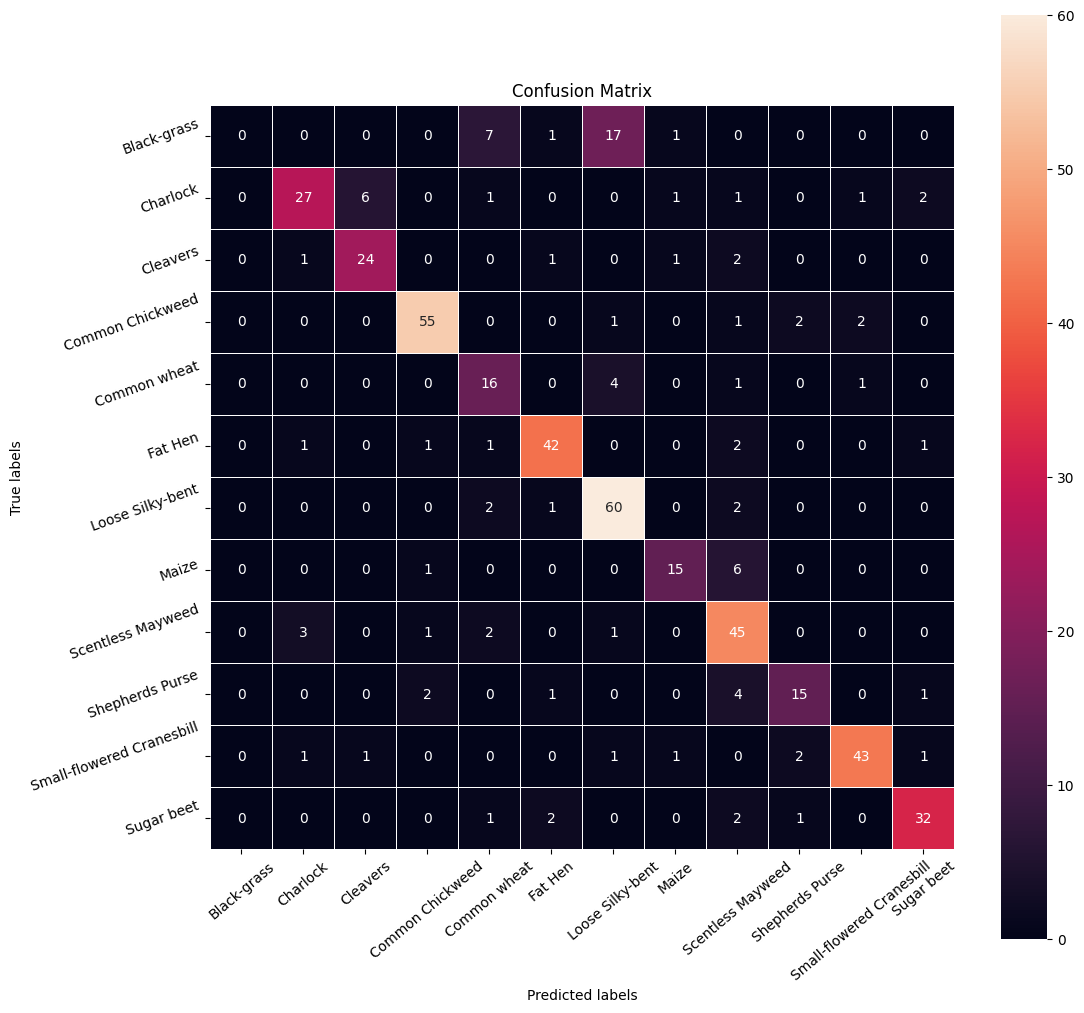

In [33]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)
confusion_matrix = tf.math.confusion_matrix(y_test_true_classes, y_test_pred_classes)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Observation**:

- Accuracy has impoved than the previous model.
- The model performs well for some classes, such as "Common Chickweed" and "Loose Silky-bent," with higher counts on the diagonal, indicating correct predictions (58 and 62, respectively).
- Certain classes, like "Black-grass," have notable misclassifications, with instances being misclassified into other categories, particularly as "Loose Silky-bent."

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [34]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.



####Model2

In [35]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [36]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [37]:
#Initializing the sequential model
model2 = Sequential()

model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))


model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding the dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.3))

# Final output layer, 12 classes for classification
model2.add(Dense(12, activation='softmax'))

opt=Adam(learning_rate=0.001)

#Compile the model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Summary of the model
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │         131,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,676 (592.48 KB)

 Trainable params: 151,612 (592.23 KB)

 Non-trainable params: 64 (256.00 B)

In [38]:
epochs = 25
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - accuracy: 0.1730 - loss: 2.3626 - val_accuracy: 0.2827 - val_loss: 2.3935 - learning_rate: 0.0010
Epoch 2/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3594 - loss: 1.9183 - val_accuracy: 0.2804 - val_loss: 2.3977 - learning_rate: 0.0010
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.3809 - loss: 1.8342 - val_accuracy: 0.4533 - val_loss: 2.3231 - learning_rate: 0.0010
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 1.5898 - val_accuracy: 0.4533 - val_loss: 2.3077 - learning_rate: 0.0010
Epoch 5/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.4417 - loss: 1.6651 - val_accuracy: 0.2453 - val_loss: 2.2854 - learning_rate: 0.0010
Epoch 6/25
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4375 - loss: 1.8132
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4375 - loss: 1.8132 - val_accu

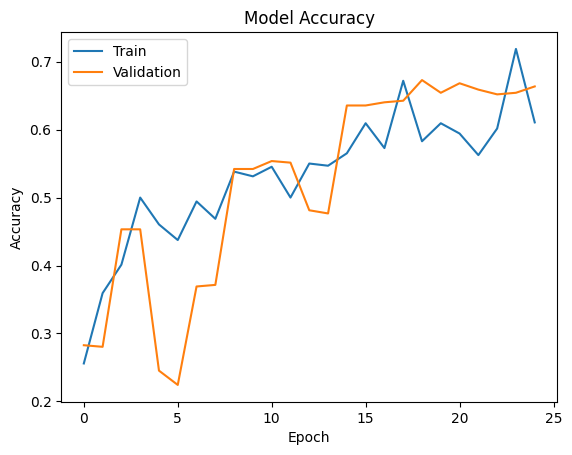

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- Initially, both training and validation accuracy rise steadily, showing that the model is learning from the data.
- Around epoch 15, there is a noticeable improvement in validation accuracy, surpassing training accuracy for a few epochs.
- There are fluctuations in validation accuracy, suggesting some instability in generalization, but it stabilizes around 0.65–0.7 toward the end.
- The gap between training and validation accuracy suggests that the model may be close to convergence

In [40]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - 54ms/step - accuracy: 0.6189 - loss: 1.1655


In [41]:
#Test prediction
y_test_pred = model2.predict(X_test_normalized)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test_encoded, axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [42]:
#Test Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test_true_classes, y_test_pred_classes)

0.6189473684210526

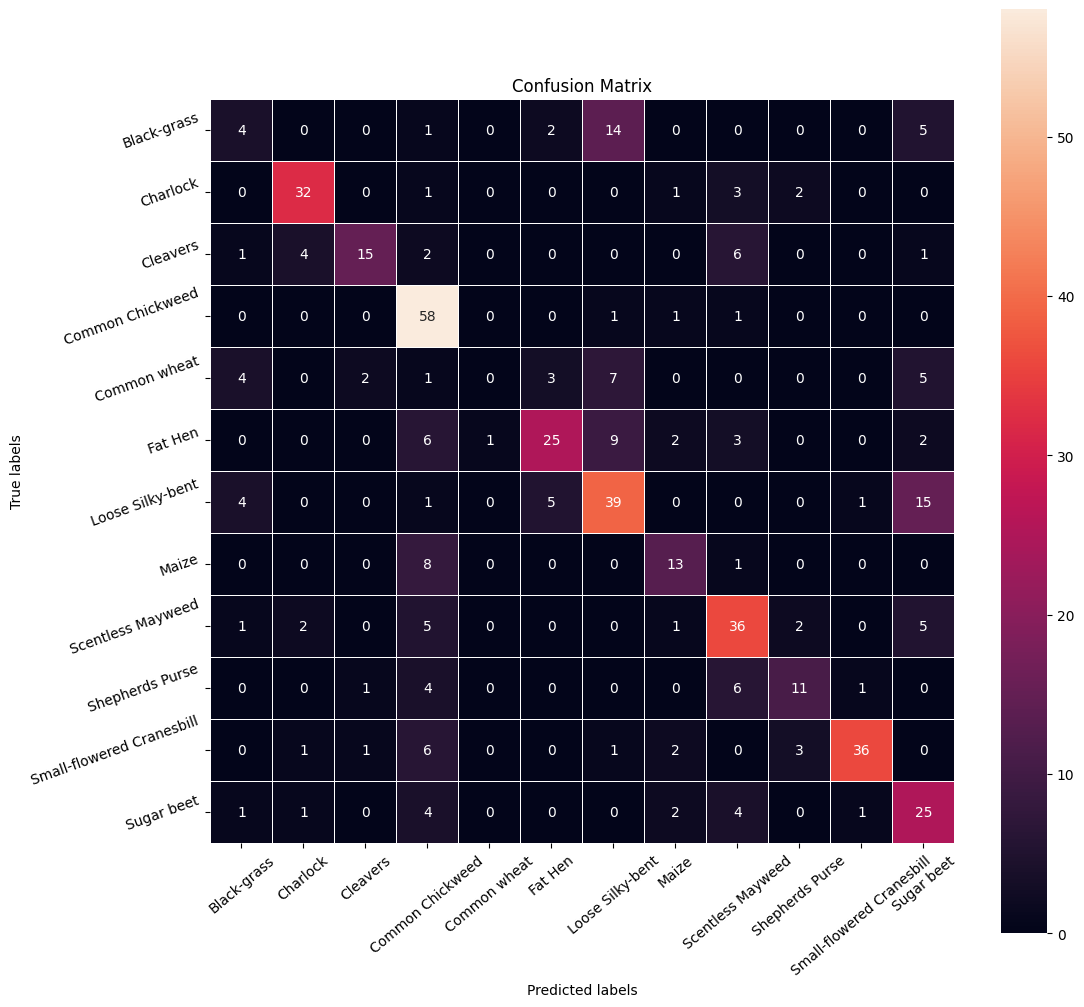

In [43]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)
confusion_matrix = tf.math.confusion_matrix(y_test_true_classes, y_test_pred_classes)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

- This confusion matrix indicates that while the model has good accuracy for certain classes, it struggles with distinguishing between some similar classes, such as "Black-grass" and "Loose Silky-bent".

####Test model 2a

In [44]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [45]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [46]:
#Initializing the sequential model
model2a = Sequential()

model2a.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model2a.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))


model2a.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model2a.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))

#adding third layer and batchnormalization
model2a.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'))
model2a.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model2a.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2a.add(Flatten())

# Adding the dense layer with 16 neurons
model2a.add(Dense(16, activation='relu'))
model2a.add(Dropout(0.3))

# Final output layer, 12 classes for classification
model2a.add(Dense(12, activation='softmax'))

opt=Adam(learning_rate=0.001)

#Compile the model
model2a.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Summary of the model
model2a.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8, 8, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,548 (162.30 KB)

 Trainable params: 41,516 (162.17 KB)

 Non-trainable params: 32 (128.00 B)

In [47]:
epochs = 24
batch_size = 64

history = model2a.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/24
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - accuracy: 0.1380 - loss: 2.4823 - val_accuracy: 0.1916 - val_loss: 2.4543 - learning_rate: 0.0010
Epoch 2/24
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2969 - loss: 2.1918 - val_accuracy: 0.1916 - val_loss: 2.4529 - learning_rate: 0.0010
Epoch 3/24
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.3333 - loss: 2.0231 - val_accuracy: 0.1308 - val_loss: 2.3602 - learning_rate: 0.0010
Epoch 4/24
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4062 - loss: 1.8075
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4062 - loss: 1.8075 - val_accuracy: 0.1285 - val_loss: 2.3594 - learning_rate: 0.0010
Epoch 5/24
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.3924 - loss: 1.7728 - val_accuracy: 0.1402 - val_loss: 2.2641 - learning_rate: 5.0000e-04
Epoch 6/24
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.4375 - loss: 1.5099 - val

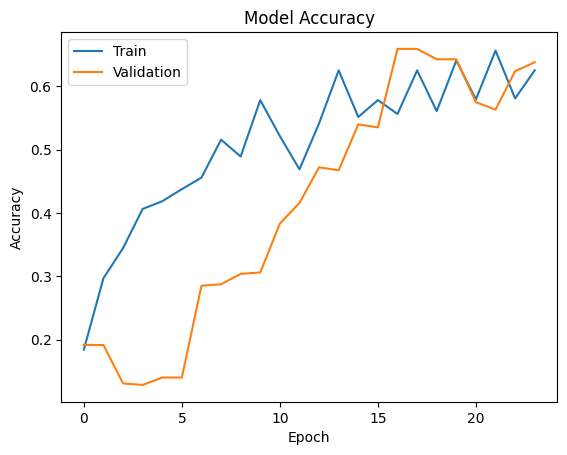

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- Early in the training process, validation accuracy exhibits a sharp drop around epoch 2, likely indicating an initial adjustment period where the model struggles to generalize.
- After epoch 5, both training and validation accuracy start to stabilize and increase steadily, indicating that the model is learning and improving its generalization capabilities.
- Toward the end, validation accuracy appears close to training accuracy, suggesting a good generalization without significant overfitting.
Summary:

In [49]:
accuracy = model2a.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - 41ms/step - accuracy: 0.6232 - loss: 1.1258


In [50]:
#Test prediction
y_test_pred = model2a.predict(X_test_normalized)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test_encoded, axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [51]:
#Test Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test_true_classes, y_test_pred_classes)

0.6231578947368421

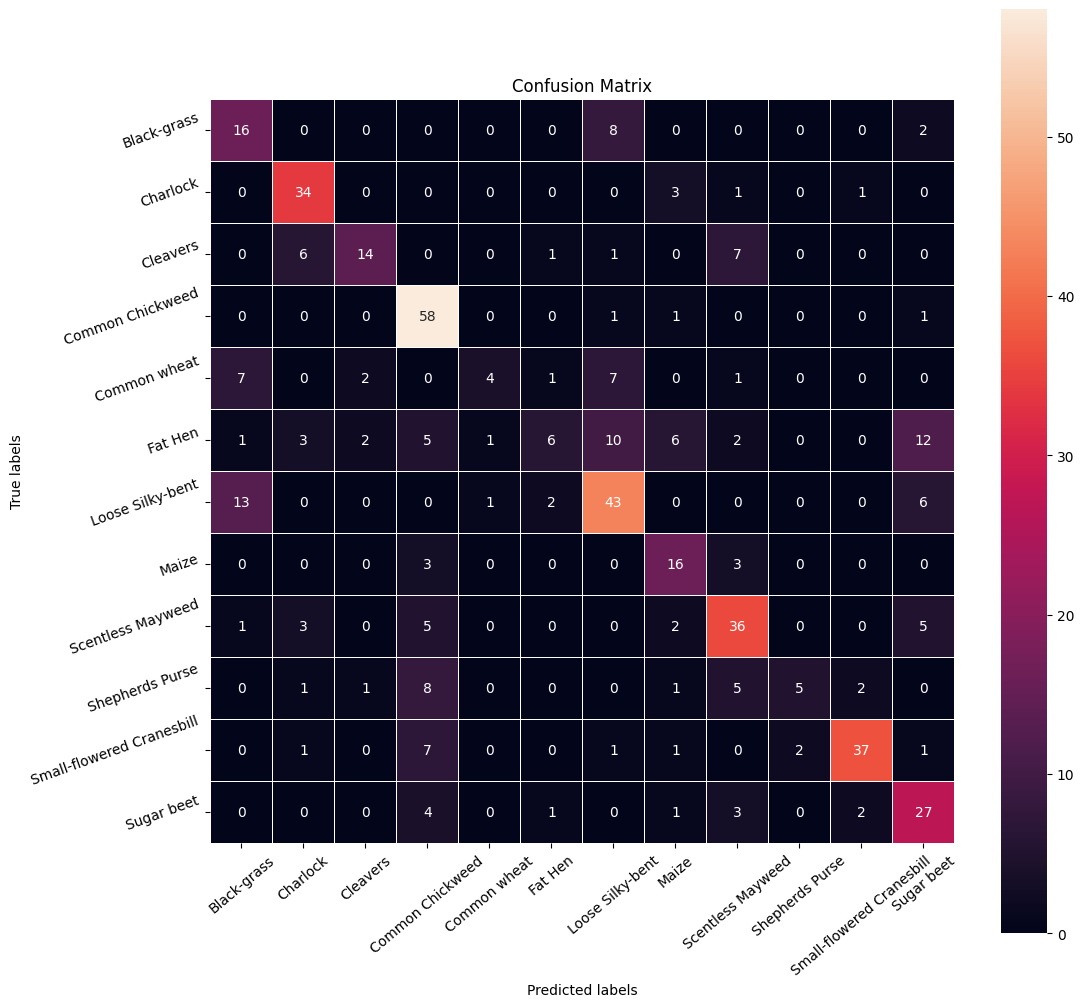

In [52]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)
confusion_matrix = tf.math.confusion_matrix(y_test_true_classes, y_test_pred_classes)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

Observation

- This confusion matrix indicates that while the model has good accuracy for certain classes, it struggles with distinguishing between some similar classes, such as "Black-grass" and "Common wheat".
- The increased fluctuations in validation accuracy, however, may indicate that the model could benefit from further regularization to stabilize the performance

####Test model 2b

In [53]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

#Initializing the sequential model
model2b = Sequential()

model2b.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model2b.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))


model2b.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model2b.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))

model2b.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'))
model2b.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model2b.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2b.add(Flatten())

# Adding the dense layer with 32 neurons
model2b.add(Dense(32, activation='relu'))
model2b.add(Dropout(0.3))

# Adding the dense layer with 16 neurons
model2b.add(Dense(16, activation='relu'))
model2b.add(Dropout(0.3))

# Final output layer, 12 classes for classification
model2b.add(Dense(12, activation='softmax'))

opt=Adam(learning_rate=0.001)

#Compile the model
model2b.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Summary of the model
model2b.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8, 8, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,476 (228.42 KB)

 Trainable params: 58,444 (228.30 KB)

 Non-trainable params: 32 (128.00 B)

In [54]:
epochs = 24
batch_size = 64

history = model2b.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/24
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 0.1121 - loss: 2.5004 - val_accuracy: 0.1449 - val_loss: 2.4731 - learning_rate: 0.0010
Epoch 2/24
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1250 - loss: 2.4497 - val_accuracy: 0.1402 - val_loss: 2.4737 - learning_rate: 0.0010
Epoch 3/24
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.1446 - loss: 2.4307 - val_accuracy: 0.1402 - val_loss: 2.4645 - learning_rate: 0.0010
Epoch 4/24
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2188 - loss: 2.3094
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2188 - loss: 2.3094 - val_accuracy: 0.1402 - val_loss: 2.4643 - learning_rate: 0.0010
Epoch 5/24
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.1989 - loss: 2.3236 - val_accuracy: 0.2523 - val_loss: 2.4365 - learning_rate: 5.0000e-04
Epoch 6/24
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2500 - loss: 2.2159 - val_

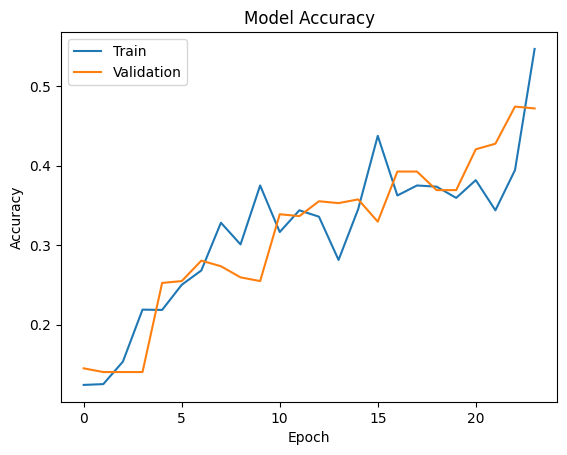

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Observation

- The plot shows a model that is learning and improving over time, with validation accuracy eventually converging toward training accuracy, suggesting a reasonable generalization. However, the fluctuations in training accuracy is there.
- We can fine tune the model to handle the fluctuations in the accuracy

In [56]:
accuracy = model2b.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - 40ms/step - accuracy: 0.4400 - loss: 1.6519


In [57]:
#Test prediction
y_test_pred = model2b.predict(X_test_normalized)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test_encoded, axis=1)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [58]:
#Test Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test_true_classes, y_test_pred_classes)


0.44

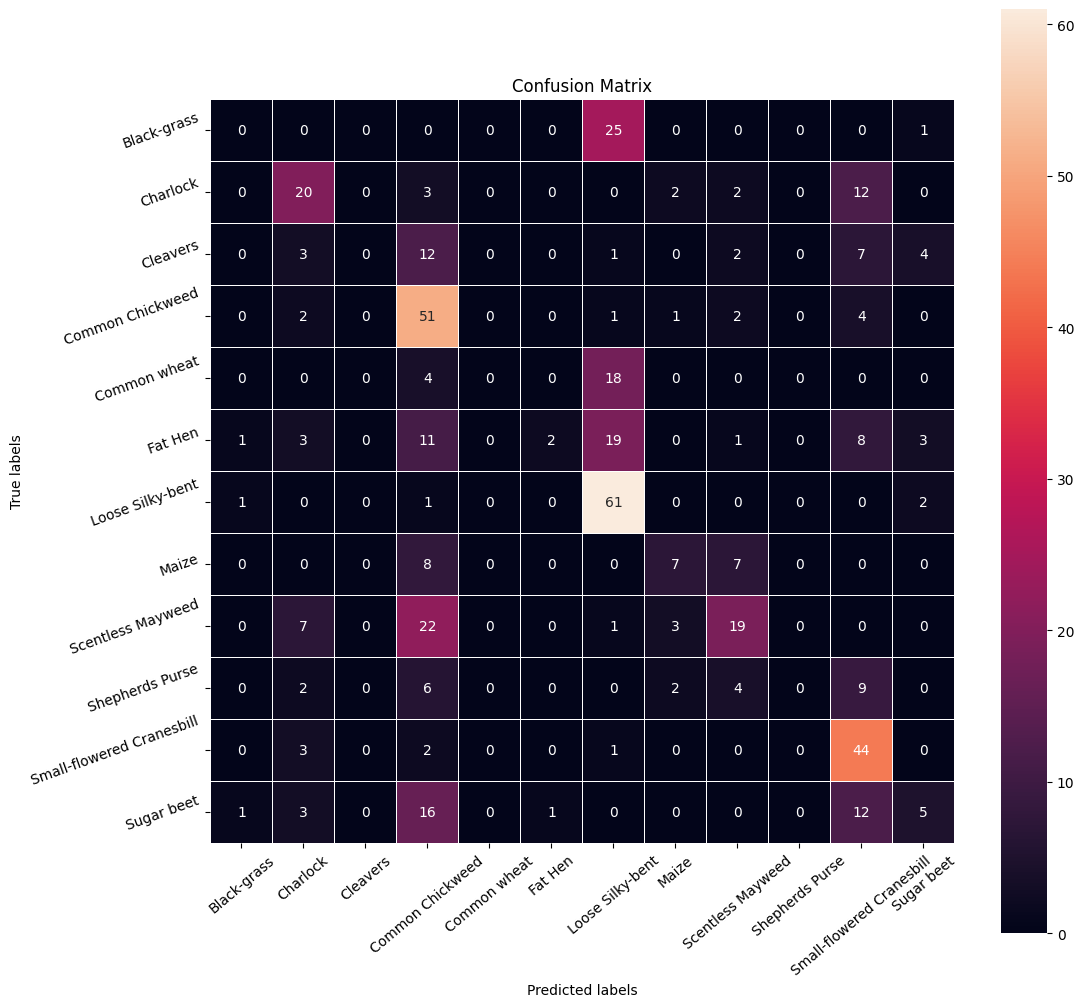

In [59]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)
confusion_matrix = tf.math.confusion_matrix(y_test_true_classes, y_test_pred_classes)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
confusion_matrix,
annot=True,
linewidths=.4,
fmt="d",
square=True,
ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

There are so many missclassifications in this model

### **Data Augmentation with VGG16**

In [60]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [61]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [62]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

#input_tensor = Input(shape=(64, 64, 3))
#vgg_model = VGG16(weights='imagenet', include_top = False, input_tensor=input_tensor)
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [64]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense layer

new_model.add(Dense(64, activation='relu'))
#new_model.add(Dropout(0.3))

new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))

new_model.add(Dense(16, activation='relu'))
#new_model.add(Dropout(0.3))

new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - accuracy: 0.1219 - loss: 2.4576 - val_accuracy: 0.2430 - val_loss: 2.2145
Epoch 2/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2857 - loss: 2.3523 - val_accuracy: 0.2500 - val_loss: 2.2070
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.2826 - loss: 2.1538 - val_accuracy: 0.3692 - val_loss: 1.9275
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3281 - loss: 2.1210 - val_accuracy: 0.3692 - val_loss: 1.9233
Epoch 5/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.3576 - loss: 1.8851 - val_accuracy: 0.4136 - val_loss: 1.7004
Epoch 6/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3594 - loss: 1.7627 - val_accuracy: 0.4136 - val_loss: 1.6976
Epoch 7/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.4148 - loss: 1.7082 - val_accuracy: 0.4416 - val_loss: 1.5831
Epoch 8/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4062 - loss: 1.7158 - val_accuracy: 0.4369 - va

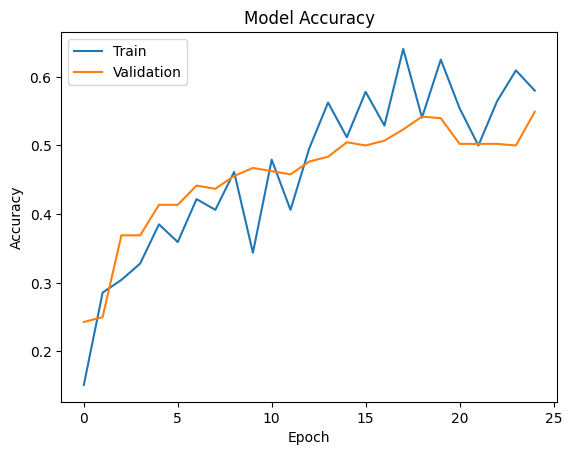

In [66]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- Both training and validation accuracy increase steadily in the initial epochs, indicating that the model is learning from the data.
- Validation accuracy catches up with training accuracy around epoch 5, and both lines closely follow each other afterward, suggesting minimal overfitting and a good balance between training and validation performance.
- There are noticeable fluctuations in training accuracy, while validation accuracy remains more stable after epoch 10, though with a slight downward trend in the final epochs.
- The final accuracy levels are around 0.6–0.7,

In [67]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 2s - 161ms/step - accuracy: 0.5453 - loss: 1.2749


In [68]:
#Test prediction
y_test_pred = new_model.predict(X_test_normalized)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test_encoded, axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


In [69]:
#Test Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test_true_classes, y_test_pred_classes)

0.5452631578947369

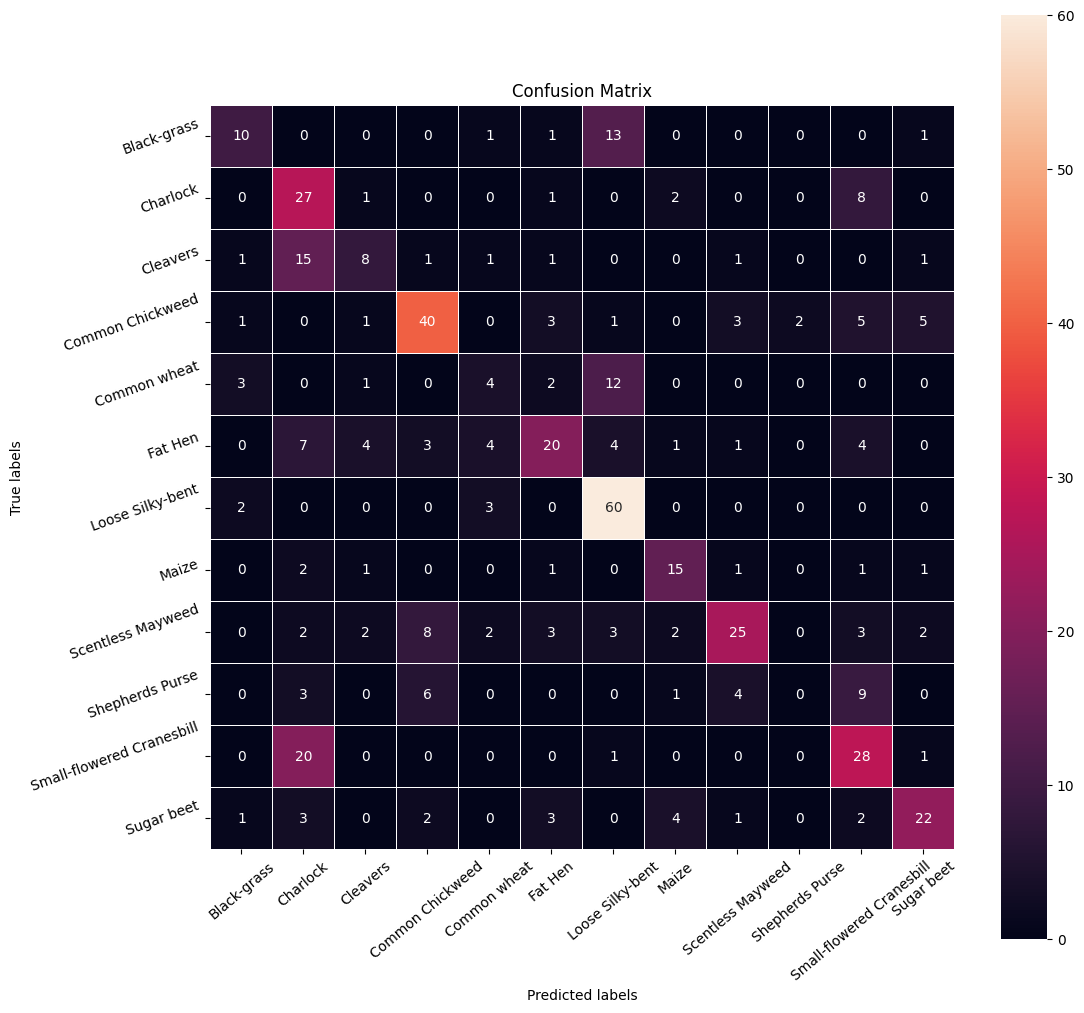

In [70]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)
confusion_matrix = tf.math.confusion_matrix(y_test_true_classes, y_test_pred_classes)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
confusion_matrix,
annot=True,
linewidths=.4,
fmt="d",
square=True,
ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

Model is  missclassifying many classes

## **Visualizing the prediction:**

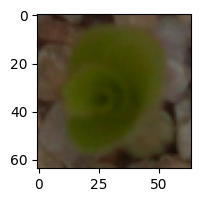

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Label ['Maize']
True Label Maize


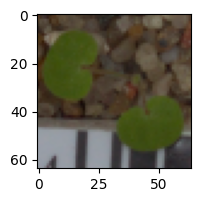

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


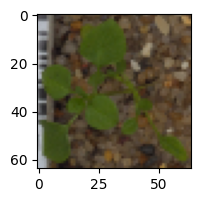

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


In [78]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[25])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[25].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[25])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[3])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[3].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[3])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[58])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[58].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[58])                                              # using inverse_transform() to get the output label from the output vector


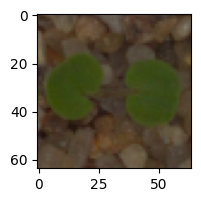

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


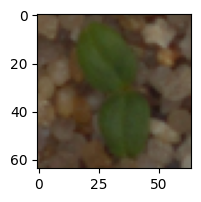

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label ['Cleavers']
True Label Cleavers


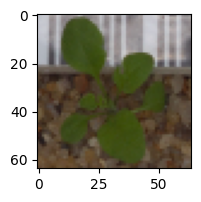

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label ['Charlock']
True Label Shepherds Purse


In [84]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector


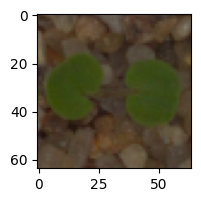

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


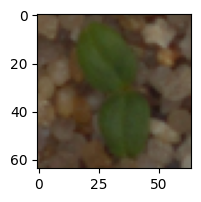

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Label ['Cleavers']
True Label Cleavers


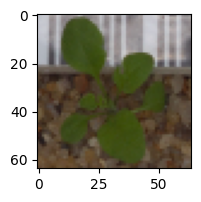

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [85]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector


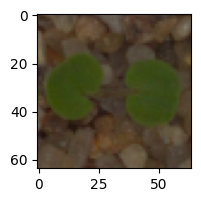

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


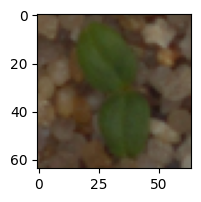

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Label ['Cleavers']
True Label Cleavers


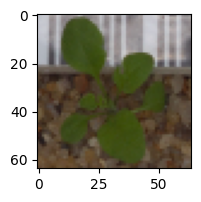

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [86]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model2a.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model2a.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model2a.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector


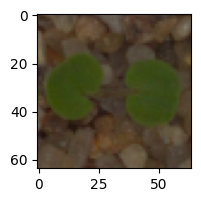

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


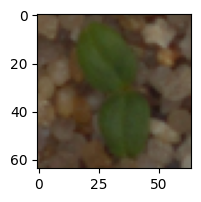

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label ['Common Chickweed']
True Label Cleavers


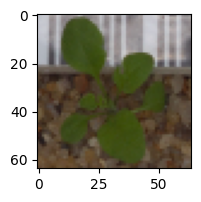

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Shepherds Purse


In [87]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model2b.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model2b.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model2b.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector


## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

Final model selection

Selecting Model1 as the final model based on the below criterias
- Training and test accuracy is around 78%
- Training and testing accuracy increases well along the epochs indicates the model is able to learning from the training data and generalizes well on the testing data.
- As per the confusion matrix when compared to the other models Model1 classifys most of the classes correct.

### Visualizing the prediction

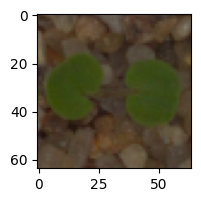

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


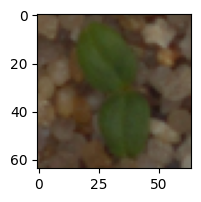

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label ['Cleavers']
True Label Cleavers


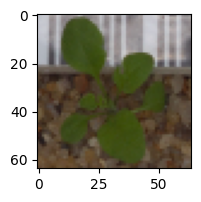

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [88]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector


## Actionable Insights and Business Recommendations

- **Deploy AI Models Through Mobile and Edge Devices:** For real-time field applications, deploy the model on mobile devices or edge devices like smart cameras or drones. These devices can identify plants and weeds on-site, allowing for immediate intervention. This setup will greatly reduce the time and effort required for manual identification and improve operational efficiency.
- **Set Up a Feedback Mechanism for Continuous Improvement:** Implement a system where farmers can provide feedback on the model’s predictions. This feedback will be valuable for continuously refining the model and adapting it to new plant varieties, weeds, or environmental changes.
- **Focus on ROI and Cost-Savings Communication:** Emphasize the cost savings from reduced manual labor and optimized chemical usage due to the precise identification of weeds and crops. Clear communication about these benefits will encourage more stakeholders in the agricultural sector to adopt the technology, aligning with the industry’s interest in efficiency and productivity.
- **Expand Model Capability to Recognize Growth Stages and Health Indicators:** Train the model to identify not only species but also plant health and growth stages. This will allow farmers to receive insights into optimal watering, fertilization, and harvesting times, leading to better yield management and reduced waste.









_____